# **Animal Competition (15%)**

> Indented block


For the non-competition mode, we will use the Animal (https://cloudstor.aarnet.edu.au/plus/s/cZYtNAeVhWD6uBX) dataset. This dataset contains images of 151 different animals.

The dataset contains a total of 6270 images corresponding to the name of animal types.

All images are RGB images of 224 pixels wide by 224 pixels high in .jpg format. The images are separated in 151 folders according to their respective class.

The task is to categorize each animal into one of 151 categories.

We provide baseline code that includes the following features:

*   Loading and Analysing the dataset using torchvision.
*   Defining a simple convolutional neural network.
*   How to use existing loss function for the model learning.
*   Train the network on the training data.
*   Test the trained network on the testing data.

The following changes could be considered:

-------
1. "Transfer" Learning (ie use a model pre-trained another dataset)
2. Change of advanced training parameters: Learning Rate, Optimizer, Batch-size, Number of Max Epochs, and Drop-out.
3. Use of a new loss function.
4. Data augmentation
5. Architectural Changes: Batch Normalization, Residual layers, etc.
6. Others

Your code should be modified from the provided baseline. A pdf report of a maximum of two pages is required to explain the changes you made from the baseline, why you chose those changes, and the improvements they achieved.

Marking Rules:
-------
We will mark the competition based on the final test accuracy on testing images and your report.

Final mark (out of 50) = acc_mark + efficiency mark + report mark
###Acc_mark 10:

We will rank all the submission results based on their test accuracy. Zero improvement over the baseline yields 0 marks. Maximum improvement over the baseline will yield 10 marks. There will be a sliding scale applied in between.

###Efficiency mark 10:

Efficiency considers not only the accuracy, but the computational cost of running the model (flops: https://en.wikipedia.org/wiki/FLOPS). Efficiency for our purposes is defined to be the ratio of accuracy (in %) to Gflops. Please report the computational cost for your final model and include the efficiency calculation in your report. Maximum improvement over the baseline will yield 10 marks. Zero improvement over the baseline yields zero marks, with a sliding scale in between.

###Report mark 30:
Your report should comprise:
1. An introduction showing your understanding of the task and of the baseline model: [10 marks]

2. A description of how you have modified aspects of the system to improve performance. [10 marks]

A recommended way to present a summary of this is via an "ablation study" table, eg:

|Method1|Method2|Method3|Accuracy|
|---|---|---|---|
|N|N|N|60%|
|Y|N|N|65%|
|Y|Y|N|77%|
|Y|Y|Y|82%|

3. Explanation of the methods for reducing the computational cost and/or improve the trade-off between accuracy and cost: [5 marks]

4. Limitations/Conclusions: [5 marks]



In [ ]:
##################################################################################################################################
### Subject: Computer Vision
### Year: 2024
### Student Name: Pragya Kaushik, Savannah Fung
### Student ID: a1840097, a1844641
### Comptetion Name: Animal Classification Competition
### Final Results:
### ACC:         FLOPs:
##################################################################################################################################

# Baseline (with no modifications)

In [6]:
# Importing libraries.

import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm

# To avoid non-essential warnings
import warnings
warnings.filterwarnings('ignore')

from torchvision import datasets, transforms, models
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Mounting G-Drive to get your dataset.
# To access Google Colab GPU; Go To: Edit >>> Netebook Settings >>> Hardware Accelarator: Select GPU.
# Reference: https://towardsdatascience.com/google-colab-import-and-export-datasets-eccf801e2971
from google.colab import drive
drive.mount('/content/drive')

# Dataset path. You should change the dataset path to the location that you place the data.
data_dir = '/content/drive/My Drive/UoA - University of Adelaide/CV/animal/dataset/dataset/'
classes = os.listdir(data_dir)

Mounted at /content/drive


In [8]:
# Performing Image Transformations.
##Hints: Data Augmentation can be applied here. Have a look on RandomFlip, RandomRotation...
train_transform = transforms.Compose([
            transforms.Resize(112),
            transforms.RandomHorizontalFlip(),
            transforms.CenterCrop(112),
            transforms.ToTensor(),
            transforms.Normalize((0.488), (0.2172)),
        ])


In [9]:
# Checking the dataset training size.
dataset = ImageFolder(data_dir, transform=train_transform)
print('Size of training dataset :', len(dataset))

Size of training dataset : 6270


In [10]:
# Viewing one of images shape.
img, label = dataset[100]
print(img.shape)

torch.Size([3, 112, 112])


In [11]:
# Preview one of the images..
def show_image(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

Label:  ailurus-fulgens (5)


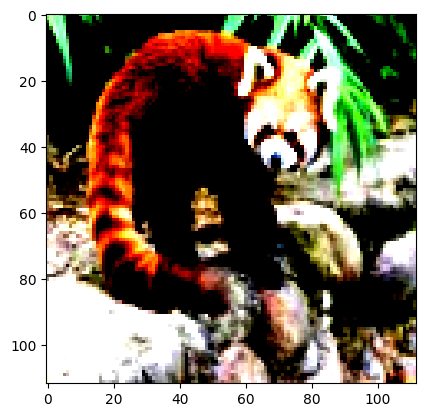

In [12]:
show_image(*dataset[200])

In [13]:
# Setting seed so that value won't change everytime.
# Splitting the dataset to training, validation, and testing category.
torch.manual_seed(10)
val_size = len(dataset)//20
test_size = len(dataset)//10
train_size = len(dataset) - val_size - test_size

In [14]:
# Random Splitting.
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])
len(train_ds), len(val_ds),len(test_ds)

(5330, 313, 627)

In [15]:
batch_size = 16
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size, num_workers=2, pin_memory=True)

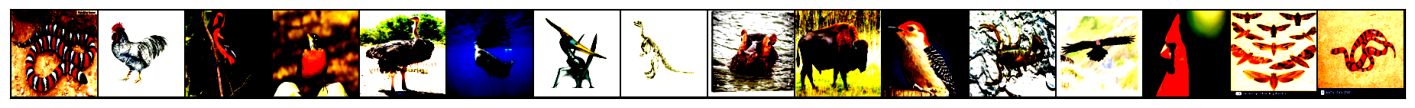

In [16]:
# Multiple images preview.
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

Class: acinonyx-jubatus, Count: 33
Class: aethia-cristatella, Count: 50
Class: agalychnis-callidryas, Count: 34
Class: agkistrodon-contortrix, Count: 50
Class: ailuropoda-melanoleuca, Count: 31
Class: ailurus-fulgens, Count: 33
Class: alces-alces, Count: 34
Class: anas-platyrhynchos, Count: 50
Class: ankylosaurus-magniventris, Count: 32
Class: apis-mellifera, Count: 50
Class: aptenodytes-forsteri, Count: 30
Class: aquila-chrysaetos, Count: 49
Class: ara-macao, Count: 50
Class: architeuthis-dux, Count: 49
Class: ardea-herodias, Count: 50
Class: balaenoptera-musculus, Count: 31
Class: betta-splendens, Count: 50
Class: bison-bison, Count: 34
Class: bos-gaurus, Count: 50
Class: bos-taurus, Count: 31
Class: bradypus-variegatus, Count: 50
Class: branta-canadensis, Count: 50
Class: canis-lupus, Count: 32
Class: canis-lupus-familiaris, Count: 31
Class: carcharodon-carcharias, Count: 32
Class: cardinalis-cardinalis, Count: 50
Class: cathartes-aura, Count: 50
Class: centrochelys-sulcata, Count: 

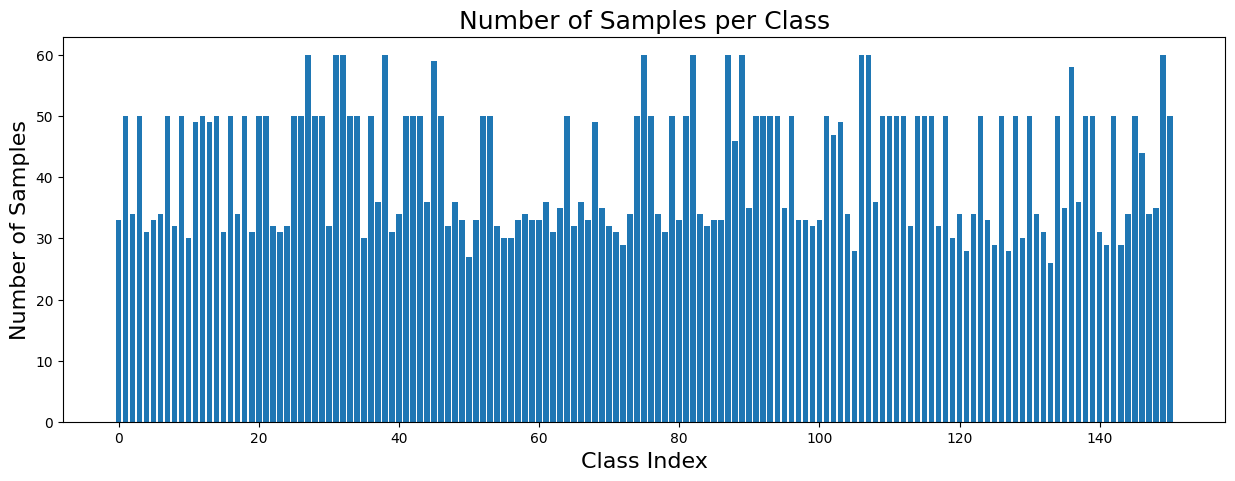

In [21]:
from collections import Counter

# Finding the number of samples per class.
class_counts = Counter(dataset.targets)
for class_index, count in class_counts.items():
    print(f'Class: {dataset.classes[class_index]}, Count: {count}')

# Optional: Display the distribution of samples per class.
plt.figure(figsize=(15, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class Index', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)
plt.title('Number of Samples per Class', fontsize=18)
plt.show()

Mean number of samples per class: 41.52
Standard deviation: 10.07
Minimum number of samples in a class: 26
Maximum number of samples in a class: 60
Median number of samples per class: 36.0
First quartile (25th percentile): 33.0
Third quartile (75th percentile): 50.0


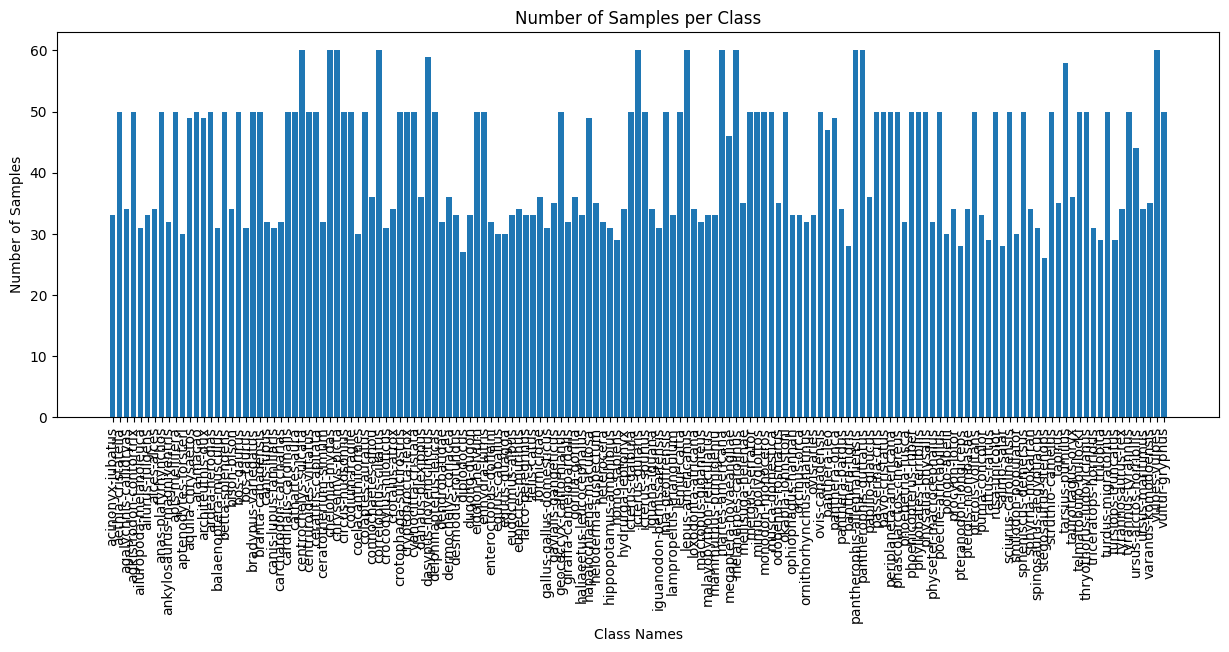

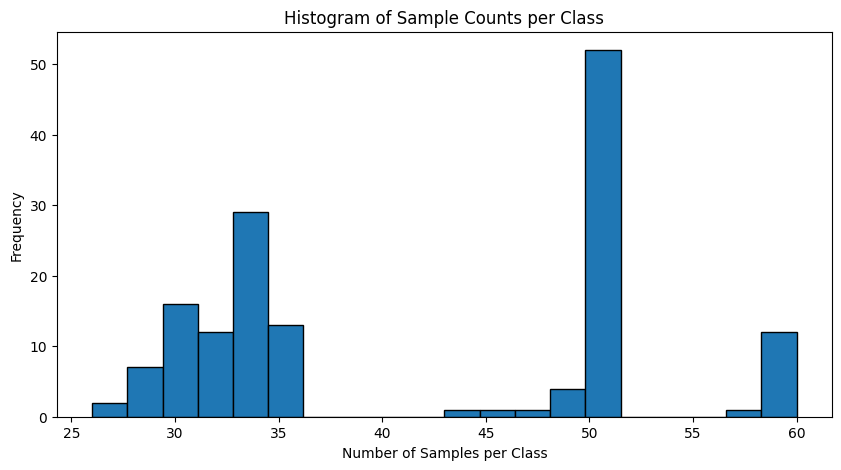

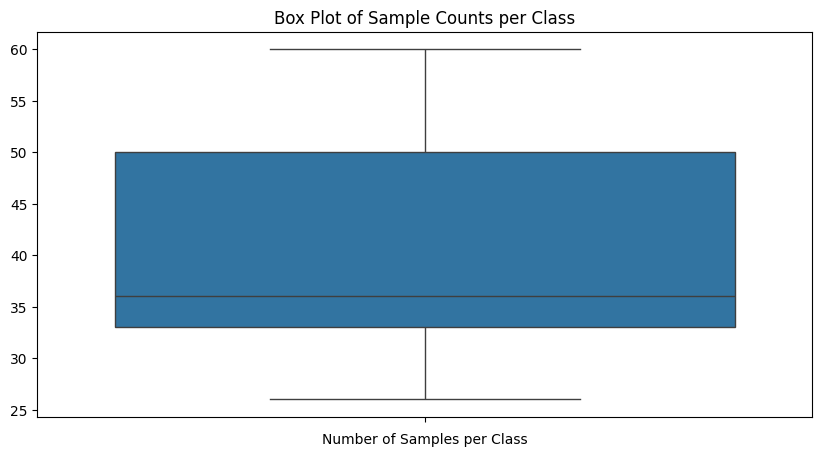

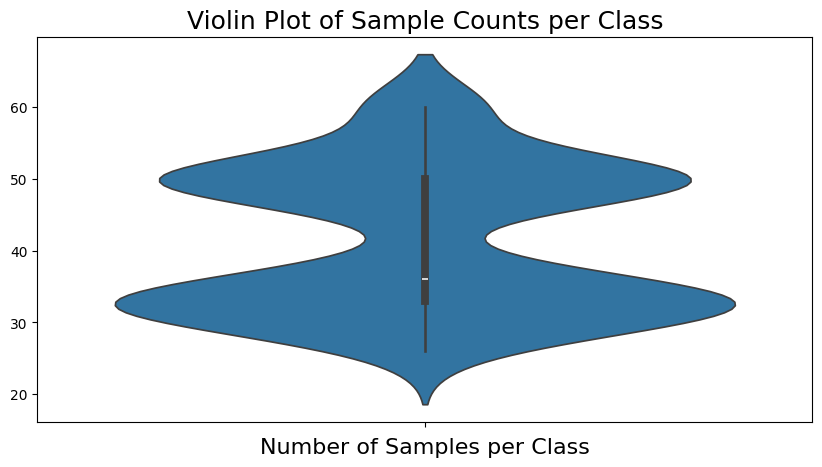

In [20]:
import seaborn as sns

# Finding the number of samples per class.
class_counts = Counter(dataset.targets)
class_names = [dataset.classes[i] for i in class_counts.keys()]
sample_counts = np.array(list(class_counts.values()))

# Statistical measures
mean_samples = np.mean(sample_counts)
std_samples = np.std(sample_counts)
min_samples = np.min(sample_counts)
max_samples = np.max(sample_counts)
median_samples = np.median(sample_counts)
quartiles = np.percentile(sample_counts, [25, 50, 75])

print(f'Mean number of samples per class: {mean_samples:.2f}')
print(f'Standard deviation: {std_samples:.2f}')
print(f'Minimum number of samples in a class: {min_samples}')
print(f'Maximum number of samples in a class: {max_samples}')
print(f'Median number of samples per class: {median_samples}')
print(f'First quartile (25th percentile): {quartiles[0]}')
print(f'Third quartile (75th percentile): {quartiles[2]}')

# Bar Plot
plt.figure(figsize=(15, 5))
plt.bar(class_names, sample_counts)
plt.xlabel('Class Names')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Class')
plt.xticks(rotation=90)
plt.show()

# Histogram
plt.figure(figsize=(10, 5))
plt.hist(sample_counts, bins=20, edgecolor='k')
plt.xlabel('Number of Samples per Class')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Counts per Class')
plt.show()

# Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(sample_counts)
plt.xlabel('Number of Samples per Class')
plt.title('Box Plot of Sample Counts per Class')
plt.show()

# Violin Plot
plt.figure(figsize=(10, 5))
sns.violinplot(sample_counts)
plt.xlabel('Number of Samples per Class', fontsize=16)
plt.title('Violin Plot of Sample Counts per Class', fontsize=18)
plt.show()

In [ ]:
 # Baseline model class for training and validation purpose. Evaluation metric function - Accuracy.
def accuracy(output, target, topk=(1,)):
    """
    Computes the accuracy over the k top predictions for the specified values of k
    In top-3 accuracy you give yourself credit for having the right answer
    if the right answer appears in your top five guesses.
    """
    with torch.no_grad():
        maxk = 3
        batch_size = target.size(0)

        # st()
        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        # st()
        # correct = pred.eq(target.view(1, -1).expand_as(pred))
        # correct = (pred == target.view(1, -1).expand_as(pred))
        correct = (pred == target.unsqueeze(dim=0)).expand_as(pred)



        correct_3 = correct[:3].reshape(-1).float().sum(0, keepdim=True)

        return correct_3.mul_(1.0 / batch_size)
#def accuracy(outputs, labels):
 #   _, preds = torch.max(outputs, dim=1)
  #  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss, Hints: the loss function can be changed to improve the accuracy
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels, (5))           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
 # To check wether Google Colab GPU has been assigned/not.

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return None

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [ ]:
input_size = 3*112*112
output_size = 151

In [ ]:
# Convolutional Network - Baseline
class ConvolutionalNetwork(ImageClassificationBase):
    def __init__(self, classes):
        super().__init__()
        self.num_classes=classes
        self.conv1=nn.Conv2d(3,64,5,1)
        self.conv2=nn.Conv2d(64,128,3,1)
        self.conv3=nn.Conv2d(128,128,3,1)
        self.conv4=nn.Conv2d(128,128,3,1)
        self.fc1=nn.Linear(128*5*5,self.num_classes)
    def forward(self,X):
        X=F.relu(self.conv1(X))
        X=F.max_pool2d(X,2,2)
        X=F.relu(self.conv2(X))
        X=F.max_pool2d(X,2,2)
        X=F.relu(self.conv3(X))
        X=F.max_pool2d(X,2,2)
        X=F.relu(self.conv4(X))
        X=F.max_pool2d(X,2,2)
        X=X.view(-1,128*5*5)
        X=self.fc1(X)

        return F.log_softmax(X, dim=1)

In [ ]:
# Model print
num_classes = 151
model = ConvolutionalNetwork(num_classes)
model.cuda()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
# We can check the input and the output shape
for images, labels in train_loader:
    out = model(images)
    print('images.shape:', images.shape)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([16, 3, 112, 112])
out.shape: torch.Size([16, 151])
out[0]: tensor([-5.0253, -5.0075, -4.9627, -5.0596, -5.0815, -4.9866, -5.0008, -4.9869,
        -5.0678, -5.0146, -5.0684, -4.9803, -4.9810, -5.0258, -5.0535, -5.0307,
        -5.0418, -5.0117, -5.0337, -5.0770, -5.0106, -5.0112, -5.0253, -4.9587,
        -4.9999, -4.9620, -4.9563, -5.0806, -5.0265, -4.9681, -4.9688, -5.0341,
        -5.0871, -5.0054, -5.0148, -4.9946, -5.0252, -4.9978, -4.9086, -5.0187,
        -5.0609, -5.0372, -5.0035, -5.0826, -4.9327, -5.0396, -5.0156, -5.0928,
        -5.0151, -5.0075, -5.0279, -5.0491, -4.9886, -5.0747, -5.0234, -5.0762,
        -5.0536, -5.0433, -5.0373, -4.9688, -5.0567, -5.0227, -5.0481, -5.0432,
        -5.0580, -4.9815, -5.0384, -5.0471, -5.0285, -5.0213, -5.0451, -5.0054,
        -5.0276, -5.0750, -5.0670, -5.0840, -5.0347, -4.9949, -5.0220, -4.9649,
        -5.0837, -5.0014, -5.0467, -4.9690, -4.9925, -4.9640, -5.0435, -5.0278,
        -5.0357, -5.0495, -5.0517, 

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model, device)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
# Functions for evaluation and training.

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(model, device)

In [ ]:
history=[evaluate(model, val_loader)]
history

[{'val_loss': 5.0156402587890625, 'val_acc': 0.02187499962747097}]

In [ ]:
# Hints: The following parameters can be changed to improve the accuracy
print(test_size)
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

627


In [ ]:
history+= fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

  0%|          | 0/334 [00:00<?, ?it/s]

Epoch [0], train_loss: 4.8211, val_loss: 4.6475, val_acc: 0.0712


  0%|          | 0/334 [00:00<?, ?it/s]

Epoch [1], train_loss: 4.3825, val_loss: 4.3211, val_acc: 0.1802


  0%|          | 0/334 [00:00<?, ?it/s]

Epoch [2], train_loss: 3.8937, val_loss: 4.0741, val_acc: 0.2410


  0%|          | 0/334 [00:00<?, ?it/s]

Epoch [3], train_loss: 3.4230, val_loss: 3.9782, val_acc: 0.2472


  0%|          | 0/334 [00:00<?, ?it/s]

Epoch [4], train_loss: 2.9415, val_loss: 4.1488, val_acc: 0.3247


  0%|          | 0/334 [00:00<?, ?it/s]

Epoch [5], train_loss: 2.4900, val_loss: 4.0003, val_acc: 0.3253


  0%|          | 0/334 [00:00<?, ?it/s]

Epoch [6], train_loss: 2.0808, val_loss: 4.1622, val_acc: 0.3510


  0%|          | 0/334 [00:00<?, ?it/s]

Epoch [7], train_loss: 1.7271, val_loss: 4.4883, val_acc: 0.3604


  0%|          | 0/334 [00:00<?, ?it/s]

Epoch [8], train_loss: 1.4216, val_loss: 4.9207, val_acc: 0.3660


  0%|          | 0/334 [00:00<?, ?it/s]

Epoch [9], train_loss: 1.1495, val_loss: 4.9861, val_acc: 0.3503


In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')
    plt.show()

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')
    plt.show()

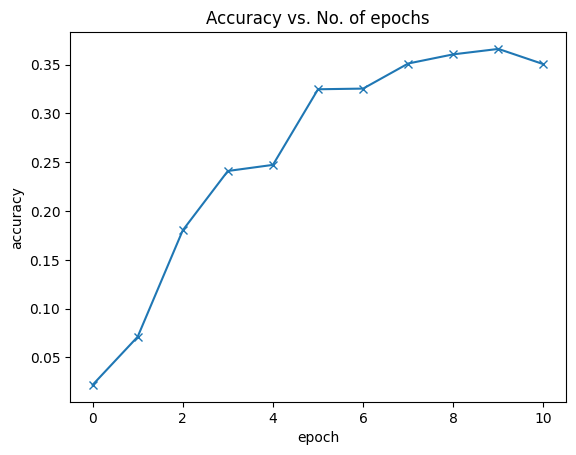

In [ ]:
plot_accuracies(history)

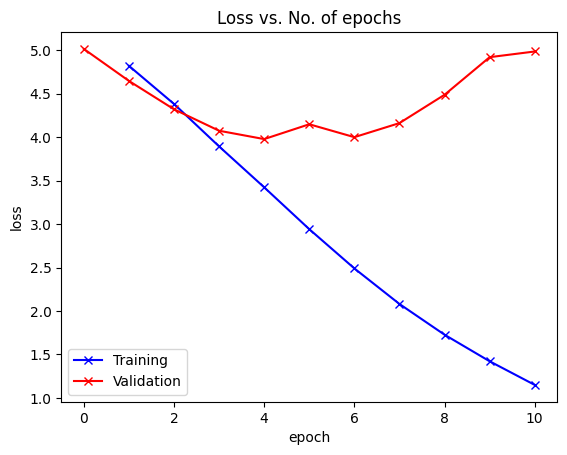

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model, test_loader)

{'val_loss': 5.0514092445373535, 'val_acc': 0.3661458492279053}

##FLOPs

In [ ]:
  #The code from https://cloudstor.aarnet.edu.au/plus/s/PcSc67ZncTSQP0E can be used to count flops
  #Download the code.
  # !wget -c https://cloudstor.aarnet.edu.au/plus/s/hXo1dK9SZqiEVn9/download
  # !mv download FLOPs_counter.py
  #!rm -rf download

In [ ]:
from FLOPs_counter import print_model_parm_flops
input = torch.randn(1, 3, 112, 112) # The input size should be the same as the size that you put into your model
#Get the network and its FLOPs
num_classes = 151
model = ConvolutionalNetwork(num_classes)
print_model_parm_flops(model, input, detail=False)

 + Number of FLOPs: 0.69G


0.689645312

In [ ]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad:
            continue
        params = parameter.numel()
        table.add_row([name, params])
        total_params += params
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

# Changing Batch Size

In [ ]:
batch_size = 64
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size, num_workers=2, pin_memory=True)

In [ ]:
device = get_default_device()
device
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [ ]:
# Model print
num_classes = 151
model_batch = ConvolutionalNetwork(num_classes)

In [ ]:
count_parameters(model_batch)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    4800    |
|  conv1.bias  |     64     |
| conv2.weight |   73728    |
|  conv2.bias  |    128     |
| conv3.weight |   147456   |
|  conv3.bias  |    128     |
| conv4.weight |   147456   |
|  conv4.bias  |    128     |
|  fc1.weight  |   483200   |
|   fc1.bias   |    151     |
+--------------+------------+
Total Trainable Params: 857239


857239

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model_batch, device)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
model_batch = to_device(model_batch, device)

In [ ]:
history=[evaluate(model_batch, val_loader)]
history

[{'val_loss': 5.017943859100342, 'val_acc': 0.012883772142231464}]

In [ ]:
# Hints: The following parameters can be changed to improve the accuracy
print(test_size)
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

627


In [ ]:
history+= fit(num_epochs, lr, model_batch, train_dl, val_dl, opt_func)

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [0], train_loss: 4.9005, val_loss: 4.6811, val_acc: 0.1047


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [1], train_loss: 4.3557, val_loss: 4.3224, val_acc: 0.1843


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [2], train_loss: 3.7728, val_loss: 4.0671, val_acc: 0.2409


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [3], train_loss: 3.3153, val_loss: 3.7835, val_acc: 0.3327


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [4], train_loss: 2.8882, val_loss: 3.6669, val_acc: 0.3451


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [5], train_loss: 2.5008, val_loss: 3.8183, val_acc: 0.3709


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [6], train_loss: 2.1736, val_loss: 3.7800, val_acc: 0.3979


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [7], train_loss: 1.8944, val_loss: 3.9058, val_acc: 0.3623


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [8], train_loss: 1.6113, val_loss: 4.0576, val_acc: 0.4205


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [9], train_loss: 1.3769, val_loss: 4.7945, val_acc: 0.4107


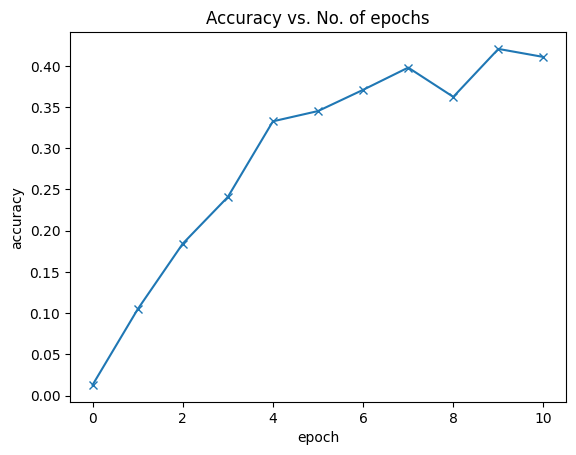

In [ ]:
plot_accuracies(history)

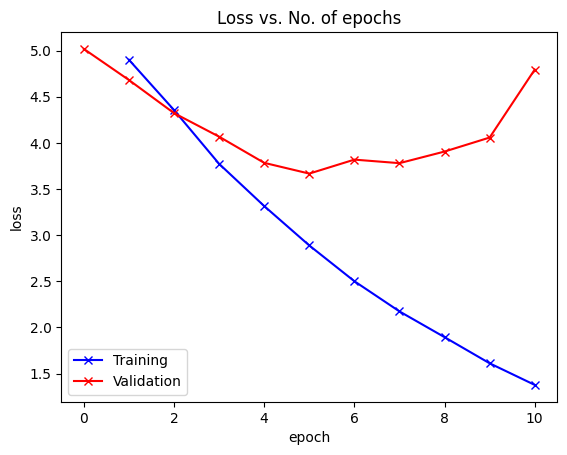

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model_batch, test_loader)

{'val_loss': 4.552286624908447, 'val_acc': 0.4149816036224365}

In [ ]:
input = torch.randn(1, 3, 112, 112).to(device) # The input size should be the same as the size that you put into your model
print_model_parm_flops(model_batch, input, detail=False)

 + Number of FLOPs: 0.69G


0.689645312

# Architectural Changes

(Adding Batch Normalization)

In [ ]:
# Convolutional Network - Baseline with Batch Normalization
class ConvolutionalNetwork(ImageClassificationBase):
    def __init__(self, classes):
        super().__init__()
        self.num_classes = classes
        self.conv1 = nn.Conv2d(3, 64, 5, 1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, 1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 128, 3, 1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, 3, 1)
        self.bn4 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 5 * 5, self.num_classes)

    def forward(self, X):
        X = F.relu(self.bn1(self.conv1(X)))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.bn2(self.conv2(X)))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.bn3(self.conv3(X)))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.bn4(self.conv4(X)))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 128 * 5 * 5)
        X = self.fc1(X)

        return F.log_softmax(X, dim=1)


In [ ]:
# Model print
num_classes = 151
model_bn = ConvolutionalNetwork(num_classes)
model_bn.cuda()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
device = get_default_device()
device
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [ ]:
# We can check the input and the output shape
for images, labels in train_loader:
    out = model_bn(images)
    print('images.shape:', images.shape)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([64, 3, 112, 112])
out.shape: torch.Size([64, 151])
out[0]: tensor([-6.1159, -5.9489, -5.6231, -4.5185, -6.0608, -5.7717, -5.6389, -4.9156,
        -6.2381, -5.4897, -3.9856, -4.2450, -4.0166, -5.0330, -6.6676, -6.0314,
        -5.5586, -6.2967, -5.7365, -4.7951, -5.4130, -5.3295, -6.0726, -4.4601,
        -4.5277, -4.8440, -4.9729, -5.3209, -6.8495, -5.8978, -5.2007, -5.6492,
        -4.6487, -5.2026, -4.8796, -6.9015, -4.9909, -3.6378, -6.5807, -5.5531,
        -5.3735, -4.3164, -5.3890, -6.0130, -5.0453, -5.7405, -5.1110, -5.1011,
        -5.9673, -5.2124, -5.9428, -4.5443, -4.6427, -4.8191, -5.3901, -6.7084,
        -4.8219, -4.7677, -5.4681, -5.8851, -7.0594, -5.7437, -3.5765, -4.2718,
        -5.7072, -5.1844, -4.7688, -5.6512, -4.5361, -5.5967, -6.0357, -4.5604,
        -6.7499, -4.1436, -5.0040, -4.9243, -4.5316, -4.6000, -5.5701, -5.2356,
        -6.6481, -5.9820, -4.9463, -5.9433, -3.9624, -5.9431, -4.0784, -5.9927,
        -3.9514, -6.1245, -4.7081, 

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model_bn, device)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
model_bn = to_device(model_bn, device)

In [ ]:
history=[evaluate(model_bn, val_loader)]
history

[{'val_loss': 5.0192389488220215, 'val_acc': 0.02302631549537182}]

In [ ]:
# Hints: The following parameters can be changed to improve the accuracy
print(test_size)
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

627


In [ ]:
history+= fit(num_epochs, lr, model_bn, train_dl, val_dl, opt_func)

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [0], train_loss: 4.8043, val_loss: 4.1797, val_acc: 0.2202


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [1], train_loss: 3.7443, val_loss: 3.6552, val_acc: 0.3397


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [2], train_loss: 3.1713, val_loss: 3.6193, val_acc: 0.3822


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [3], train_loss: 2.7267, val_loss: 3.4808, val_acc: 0.3947


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [4], train_loss: 2.3191, val_loss: 3.4183, val_acc: 0.4139


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [5], train_loss: 2.0369, val_loss: 3.3253, val_acc: 0.4639


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [6], train_loss: 1.7065, val_loss: 3.3696, val_acc: 0.4819


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [7], train_loss: 1.4366, val_loss: 3.1101, val_acc: 0.5021


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [8], train_loss: 1.1995, val_loss: 3.4665, val_acc: 0.4803


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [9], train_loss: 1.0173, val_loss: 3.2220, val_acc: 0.4979


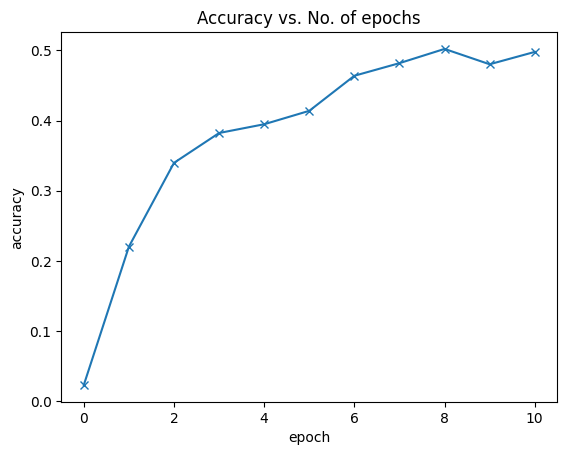

In [ ]:
plot_accuracies(history)

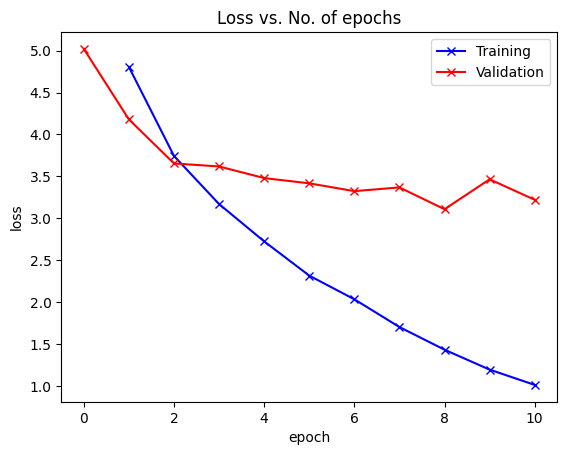

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model_bn, test_loader)

{'val_loss': 2.9831299781799316, 'val_acc': 0.5802696347236633}

In [ ]:
input = torch.randn(1, 3, 112, 112).to(device) # The input size should be the same as the size that you put into your model
print_model_parm_flops(model_bn, input, detail=False)

 + Number of FLOPs: 0.69G


0.694361856

# Learning Rate

So far have been using a constant learning rate = 0.001

## (Implementing LR scheduling -- ReduceLROnPlateau)

In [ ]:
# Evaluate the model
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_current_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

# Fit the model
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=1, verbose=True)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        # Print the current learning rate
        current_lr = get_current_lr(optimizer)
        print(f'Epoch {epoch+1}/{epochs}, Learning Rate: {current_lr}')
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        print(result)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
        # Step the scheduler
        scheduler.step(result['val_loss'])
    return history


In [ ]:
# Model print
num_classes = 151
model_lr = ConvolutionalNetwork(num_classes)
count_parameters(model_lr)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    4800    |
|  conv1.bias  |     64     |
|  bn1.weight  |     64     |
|   bn1.bias   |     64     |
| conv2.weight |   73728    |
|  conv2.bias  |    128     |
|  bn2.weight  |    128     |
|   bn2.bias   |    128     |
| conv3.weight |   147456   |
|  conv3.bias  |    128     |
|  bn3.weight  |    128     |
|   bn3.bias   |    128     |
| conv4.weight |   147456   |
|  conv4.bias  |    128     |
|  bn4.weight  |    128     |
|   bn4.bias   |    128     |
|  fc1.weight  |   483200   |
|   fc1.bias   |    151     |
+--------------+------------+
Total Trainable Params: 858135


858135

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model_lr, device)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
model_lr = to_device(model_lr, device)
model_lr.cuda()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
history=[evaluate(model_lr, val_loader)]
history

[{'val_loss': 5.016237735748291, 'val_acc': 0.01913377270102501}]

In [ ]:
# Hints: The following parameters can be changed to improve the accuracy
print(test_size)
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

627


In [ ]:
history+= fit(num_epochs, lr, model_lr, train_dl, val_dl, opt_func)

Epoch 1/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 4.158023834228516, 'val_acc': 0.19599781930446625}
Epoch [0], train_loss: 4.6918, val_loss: 4.1580, val_acc: 0.1960
Epoch 2/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 3.815222978591919, 'val_acc': 0.28114035725593567}
Epoch [1], train_loss: 3.5949, val_loss: 3.8152, val_acc: 0.2811
Epoch 3/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 3.5267860889434814, 'val_acc': 0.3783442974090576}
Epoch [2], train_loss: 3.0840, val_loss: 3.5268, val_acc: 0.3783
Epoch 4/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 3.365689992904663, 'val_acc': 0.4283443093299866}
Epoch [3], train_loss: 2.6797, val_loss: 3.3657, val_acc: 0.4283
Epoch 5/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 3.7060654163360596, 'val_acc': 0.3932017683982849}
Epoch [4], train_loss: 2.2469, val_loss: 3.7061, val_acc: 0.3932
Epoch 6/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 3.240344285964966, 'val_acc': 0.4958881437778473}
Epoch [5], train_loss: 1.9437, val_loss: 3.2403, val_acc: 0.4959
Epoch 7/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 3.3006603717803955, 'val_acc': 0.452521950006485}
Epoch [6], train_loss: 1.6595, val_loss: 3.3007, val_acc: 0.4525
Epoch 8/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 3.1354787349700928, 'val_acc': 0.5091556906700134}
Epoch [7], train_loss: 1.3856, val_loss: 3.1355, val_acc: 0.5092
Epoch 9/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 3.3170418739318848, 'val_acc': 0.4935307204723358}
Epoch [8], train_loss: 1.1055, val_loss: 3.3170, val_acc: 0.4935
Epoch 10/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 3.7746026515960693, 'val_acc': 0.48064693808555603}
Epoch [9], train_loss: 0.9454, val_loss: 3.7746, val_acc: 0.4806


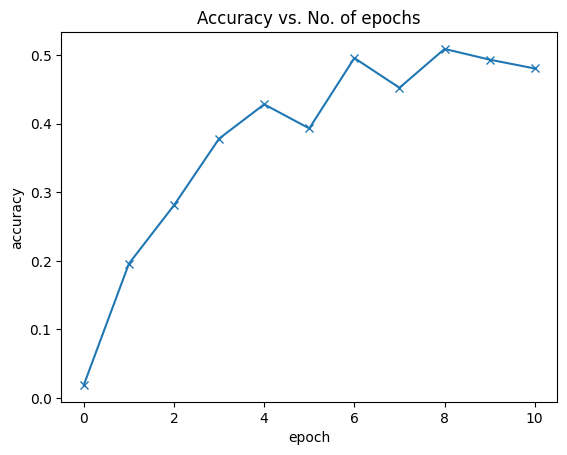

In [ ]:
plot_accuracies(history)

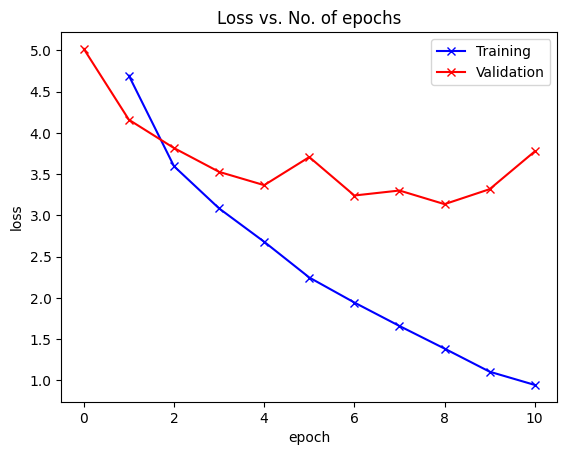

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model_lr, test_loader)

{'val_loss': 3.4276680946350098, 'val_acc': 0.5255821347236633}

In [ ]:
input = torch.randn(1, 3, 112, 112).to(device) # The input size should be the same as the size that you put into your model
print_model_parm_flops(model_lr, input, detail=False)

 + Number of FLOPs: 0.69G


0.694361856

## (Implementing LR scheduling -- StepLR)

In [ ]:
# Evaluate the model
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_current_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

# Fit the model
def fit(epochs, initial_lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), initial_lr)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Adjust step_size and gamma as needed

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        # Print the current learning rate
        current_lr = get_current_lr(optimizer)
        print(f'Epoch {epoch+1}/{epochs}, Learning Rate: {current_lr}')

        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        print(result)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)

        # Step the scheduler
        scheduler.step()

    return history

In [ ]:
# Model print
num_classes = 151
model_lr1 = ConvolutionalNetwork(num_classes)
count_parameters(model_lr1)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    4800    |
|  conv1.bias  |     64     |
|  bn1.weight  |     64     |
|   bn1.bias   |     64     |
| conv2.weight |   73728    |
|  conv2.bias  |    128     |
|  bn2.weight  |    128     |
|   bn2.bias   |    128     |
| conv3.weight |   147456   |
|  conv3.bias  |    128     |
|  bn3.weight  |    128     |
|   bn3.bias   |    128     |
| conv4.weight |   147456   |
|  conv4.bias  |    128     |
|  bn4.weight  |    128     |
|   bn4.bias   |    128     |
|  fc1.weight  |   483200   |
|   fc1.bias   |    151     |
+--------------+------------+
Total Trainable Params: 858135


858135

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model_lr1, device)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
model_lr1 = to_device(model_lr1, device)
model_lr1.cuda()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
history=[evaluate(model_lr1, val_loader)]
history

[{'val_loss': 5.017475128173828, 'val_acc': 0.00937500037252903}]

In [ ]:
# Hints: The following parameters can be changed to improve the accuracy
print(test_size)
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

627


In [ ]:
history+= fit(num_epochs, lr, model_lr1, train_dl, val_dl, opt_func)

Epoch 1/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 4.1899237632751465, 'val_acc': 0.2120065689086914}
Epoch [0], train_loss: 4.7028, val_loss: 4.1899, val_acc: 0.2120
Epoch 2/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 3.6614532470703125, 'val_acc': 0.3088267743587494}
Epoch [1], train_loss: 3.6732, val_loss: 3.6615, val_acc: 0.3088
Epoch 3/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 3.592397689819336, 'val_acc': 0.38459429144859314}
Epoch [2], train_loss: 3.1388, val_loss: 3.5924, val_acc: 0.3846
Epoch 4/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 3.5963680744171143, 'val_acc': 0.3584429919719696}
Epoch [3], train_loss: 2.7507, val_loss: 3.5964, val_acc: 0.3584
Epoch 5/10, Learning Rate: 0.001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 3.5841445922851562, 'val_acc': 0.4361293911933899}
Epoch [4], train_loss: 2.3655, val_loss: 3.5841, val_acc: 0.4361
Epoch 6/10, Learning Rate: 0.0001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 2.861043930053711, 'val_acc': 0.5282894968986511}
Epoch [5], train_loss: 1.7026, val_loss: 2.8610, val_acc: 0.5283
Epoch 7/10, Learning Rate: 0.0001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 2.8247430324554443, 'val_acc': 0.5189144611358643}
Epoch [6], train_loss: 1.4967, val_loss: 2.8247, val_acc: 0.5189
Epoch 8/10, Learning Rate: 0.0001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 2.835299015045166, 'val_acc': 0.5251644849777222}
Epoch [7], train_loss: 1.4308, val_loss: 2.8353, val_acc: 0.5252
Epoch 9/10, Learning Rate: 0.0001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 2.8139216899871826, 'val_acc': 0.5439144968986511}
Epoch [8], train_loss: 1.3537, val_loss: 2.8139, val_acc: 0.5439
Epoch 10/10, Learning Rate: 0.0001


  0%|          | 0/84 [00:00<?, ?it/s]

{'val_loss': 2.818397283554077, 'val_acc': 0.5208881497383118}
Epoch [9], train_loss: 1.2734, val_loss: 2.8184, val_acc: 0.5209


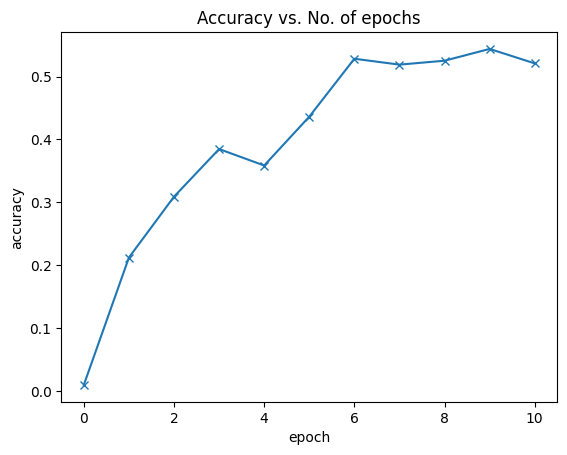

In [ ]:
plot_accuracies(history)

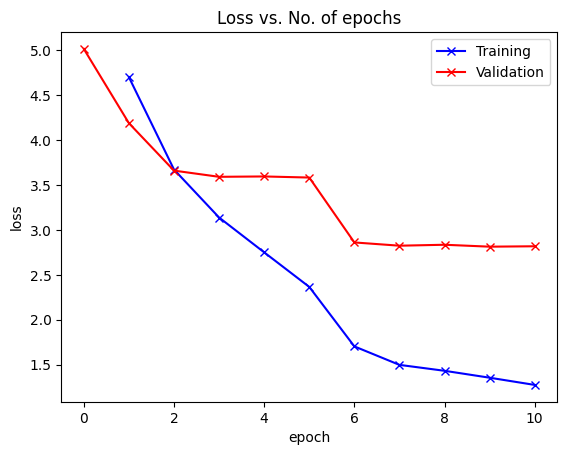

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model_lr1, test_loader)

{'val_loss': 2.707710027694702, 'val_acc': 0.5701286792755127}

In [ ]:
input = torch.randn(1, 3, 112, 112).to(device) # The input size should be the same as the size that you put into your model
print_model_parm_flops(model_lr1, input, detail=False)

 + Number of FLOPs: 0.69G


0.694361856

## Constant LR

## Testing a higher lr = 0.005

In [ ]:
# Back to Constant LR

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
# Model print
num_classes = 151
model_lr2 = ConvolutionalNetwork(num_classes)
count_parameters(model_lr2)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    4800    |
|  conv1.bias  |     64     |
|  bn1.weight  |     64     |
|   bn1.bias   |     64     |
| conv2.weight |   73728    |
|  conv2.bias  |    128     |
|  bn2.weight  |    128     |
|   bn2.bias   |    128     |
| conv3.weight |   147456   |
|  conv3.bias  |    128     |
|  bn3.weight  |    128     |
|   bn3.bias   |    128     |
| conv4.weight |   147456   |
|  conv4.bias  |    128     |
|  bn4.weight  |    128     |
|   bn4.bias   |    128     |
|  fc1.weight  |   483200   |
|   fc1.bias   |    151     |
+--------------+------------+
Total Trainable Params: 858135


858135

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model_lr2, device)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
model_lr2 = to_device(model_lr2, device)
model_lr2.cuda()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
history=[evaluate(model_lr2, val_loader)]
history

[{'val_loss': 5.0218071937561035, 'val_acc': 0.0163925439119339}]

In [ ]:
# Hints: The following parameters can be changed to improve the accuracy
print(test_size)
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.005

627


In [ ]:
history+= fit(num_epochs, lr, model_lr2, train_dl, val_dl, opt_func)

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [0], train_loss: 6.5552, val_loss: 4.5488, val_acc: 0.1191


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [1], train_loss: 4.2400, val_loss: 4.2323, val_acc: 0.1570


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [2], train_loss: 3.8830, val_loss: 3.9338, val_acc: 0.2468


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [3], train_loss: 3.5831, val_loss: 3.7960, val_acc: 0.3057


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [4], train_loss: 3.2491, val_loss: 3.9862, val_acc: 0.2983


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [5], train_loss: 2.9735, val_loss: 3.7476, val_acc: 0.3471


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [6], train_loss: 2.6309, val_loss: 3.7031, val_acc: 0.3791


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [7], train_loss: 2.3050, val_loss: 3.7969, val_acc: 0.3783


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [8], train_loss: 1.9152, val_loss: 3.9840, val_acc: 0.4166


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [9], train_loss: 1.7047, val_loss: 3.8325, val_acc: 0.4229


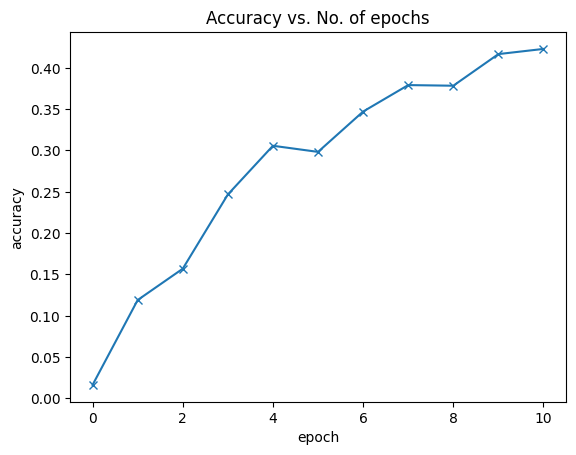

In [ ]:
plot_accuracies(history)

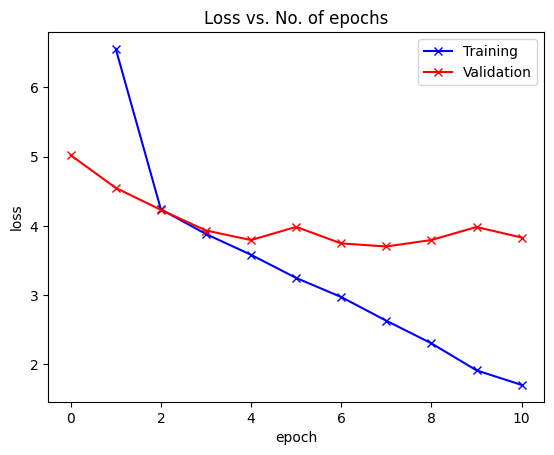

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model_lr2, test_loader)

{'val_loss': 3.7166855335235596, 'val_acc': 0.46890315413475037}

In [ ]:
input = torch.randn(1, 3, 112, 112).to(device) # The input size should be the same as the size that you put into your model
print_model_parm_flops(model_lr2, input, detail=False)

 + Number of FLOPs: 0.69G


0.694361856

## Testing a lower lr = 0.0005

In [ ]:
# Model print
num_classes = 151
model_lr3 = ConvolutionalNetwork(num_classes)
count_parameters(model_lr3)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    4800    |
|  conv1.bias  |     64     |
|  bn1.weight  |     64     |
|   bn1.bias   |     64     |
| conv2.weight |   73728    |
|  conv2.bias  |    128     |
|  bn2.weight  |    128     |
|   bn2.bias   |    128     |
| conv3.weight |   147456   |
|  conv3.bias  |    128     |
|  bn3.weight  |    128     |
|   bn3.bias   |    128     |
| conv4.weight |   147456   |
|  conv4.bias  |    128     |
|  bn4.weight  |    128     |
|   bn4.bias   |    128     |
|  fc1.weight  |   483200   |
|   fc1.bias   |    151     |
+--------------+------------+
Total Trainable Params: 858135


858135

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model_lr3, device)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
model_lr3 = to_device(model_lr3, device)
model_lr3.cuda()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
history=[evaluate(model_lr3, val_loader)]
history

[{'val_loss': 5.021073818206787, 'val_acc': 0.00975877232849598}]

In [ ]:
# Hints: The following parameters can be changed to improve the accuracy
print(test_size)
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.0005

627


In [ ]:
history+= fit(num_epochs, lr, model_lr3, train_dl, val_dl, opt_func)

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [0], train_loss: 4.5549, val_loss: 3.9718, val_acc: 0.2600


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [1], train_loss: 3.4877, val_loss: 3.5466, val_acc: 0.3658


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [2], train_loss: 2.8934, val_loss: 3.4455, val_acc: 0.3998


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [3], train_loss: 2.4748, val_loss: 3.2572, val_acc: 0.4518


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [4], train_loss: 2.0842, val_loss: 3.0247, val_acc: 0.4838


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [5], train_loss: 1.7837, val_loss: 3.1397, val_acc: 0.5053


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [6], train_loss: 1.5051, val_loss: 3.1218, val_acc: 0.4865


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [7], train_loss: 1.2936, val_loss: 2.9338, val_acc: 0.5377


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [8], train_loss: 1.0613, val_loss: 2.8973, val_acc: 0.5408


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.8725, val_loss: 2.8554, val_acc: 0.5318


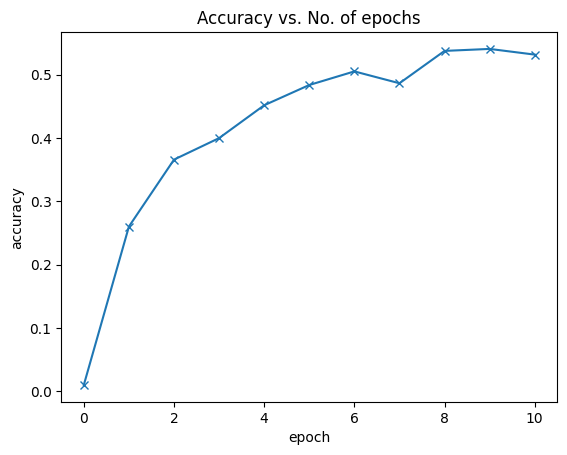

In [ ]:
plot_accuracies(history)

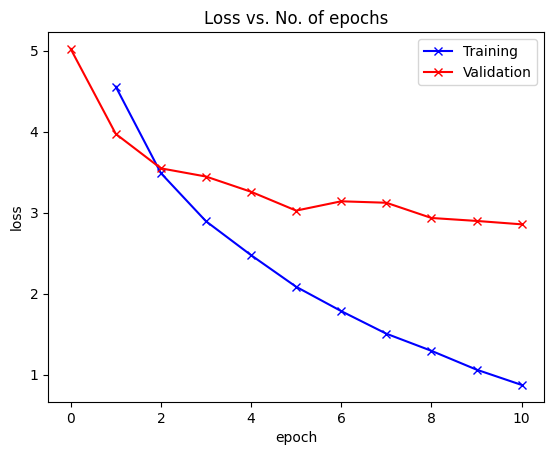

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model_lr3, test_loader)

{'val_loss': 2.706352472305298, 'val_acc': 0.601409375667572}

In [ ]:
input = torch.randn(1, 3, 112, 112).to(device) # The input size should be the same as the size that you put into your model
print_model_parm_flops(model_lr3, input, detail=False)

 + Number of FLOPs: 0.69G


0.694361856

## Testing a lower lr = 0.0001

In [ ]:
# Model print
num_classes = 151
model_lr4 = ConvolutionalNetwork(num_classes)
count_parameters(model_lr4)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    4800    |
|  conv1.bias  |     64     |
|  bn1.weight  |     64     |
|   bn1.bias   |     64     |
| conv2.weight |   73728    |
|  conv2.bias  |    128     |
|  bn2.weight  |    128     |
|   bn2.bias   |    128     |
| conv3.weight |   147456   |
|  conv3.bias  |    128     |
|  bn3.weight  |    128     |
|   bn3.bias   |    128     |
| conv4.weight |   147456   |
|  conv4.bias  |    128     |
|  bn4.weight  |    128     |
|   bn4.bias   |    128     |
|  fc1.weight  |   483200   |
|   fc1.bias   |    151     |
+--------------+------------+
Total Trainable Params: 858135


858135

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model_lr4, device)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
model_lr4 = to_device(model_lr4, device)
model_lr4.cuda()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
history=[evaluate(model_lr4, val_loader)]
history

[{'val_loss': 5.01943826675415, 'val_acc': 0.02225877158343792}]

In [ ]:
# Hints: The following parameters can be changed to improve the accuracy
print(test_size)
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.0001

627


In [ ]:
history+= fit(num_epochs, lr, model_lr4, train_dl, val_dl, opt_func)

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [0], train_loss: 4.7204, val_loss: 4.3972, val_acc: 0.1499


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [1], train_loss: 3.9718, val_loss: 3.9995, val_acc: 0.2663


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [2], train_loss: 3.5174, val_loss: 3.7362, val_acc: 0.2995


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [3], train_loss: 3.1310, val_loss: 3.5765, val_acc: 0.3315


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [4], train_loss: 2.8294, val_loss: 3.3288, val_acc: 0.3857


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [5], train_loss: 2.5801, val_loss: 3.2635, val_acc: 0.4447


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [6], train_loss: 2.3632, val_loss: 3.1320, val_acc: 0.4604


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [7], train_loss: 2.1633, val_loss: 3.0322, val_acc: 0.4627


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [8], train_loss: 2.0159, val_loss: 3.0093, val_acc: 0.4779


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [9], train_loss: 1.8255, val_loss: 2.9967, val_acc: 0.4845


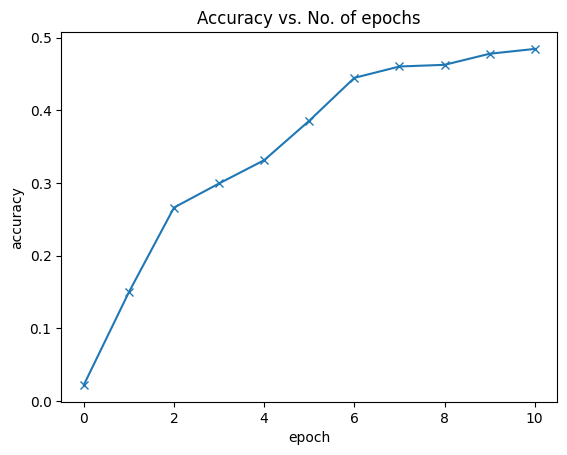

In [ ]:
plot_accuracies(history)

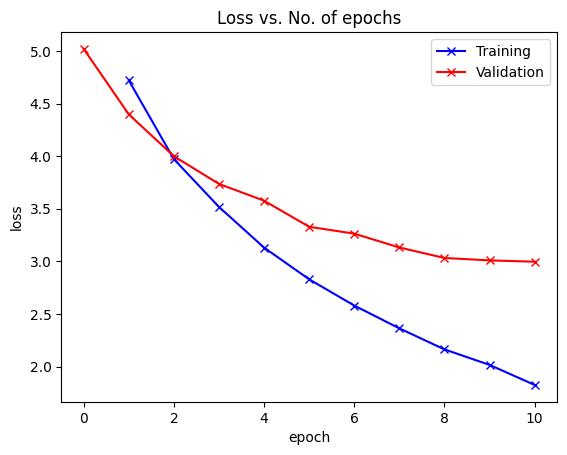

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model_lr4, test_loader)

{'val_loss': 2.8619205951690674, 'val_acc': 0.5181679129600525}

In [ ]:
input = torch.randn(1, 3, 112, 112).to(device) # The input size should be the same as the size that you put into your model
print_model_parm_flops(model_lr4, input, detail=False)

 + Number of FLOPs: 0.69G


0.694361856

###Gonna use these 3 best modifications for further investigation:
*   batch size = 64
*   batch normalisation
*   constant LR=0.0005

# Optimizer Changes

## SGD

In [ ]:
# Model print
num_classes = 151
model_op1 = ConvolutionalNetwork(num_classes)
count_parameters(model_op1)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    4800    |
|  conv1.bias  |     64     |
|  bn1.weight  |     64     |
|   bn1.bias   |     64     |
| conv2.weight |   73728    |
|  conv2.bias  |    128     |
|  bn2.weight  |    128     |
|   bn2.bias   |    128     |
| conv3.weight |   147456   |
|  conv3.bias  |    128     |
|  bn3.weight  |    128     |
|   bn3.bias   |    128     |
| conv4.weight |   147456   |
|  conv4.bias  |    128     |
|  bn4.weight  |    128     |
|   bn4.bias   |    128     |
|  fc1.weight  |   483200   |
|   fc1.bias   |    151     |
+--------------+------------+
Total Trainable Params: 858135


858135

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model_op1, device)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
model_op1 = to_device(model_op1, device)
model_op1.cuda()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
history=[evaluate(model_op1, val_loader)]
history

[{'val_loss': 5.016304016113281, 'val_acc': 0.02538377046585083}]

In [ ]:
# Hints: The following parameters can be changed to improve the accuracy
print(test_size)
num_epochs = 10
opt_func = torch.optim.SGD
lr = 0.0005

627


In [ ]:
history+= fit(num_epochs, lr, model_op1, train_dl, val_dl, opt_func)

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [0], train_loss: 5.0964, val_loss: 5.0200, val_acc: 0.0223


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [1], train_loss: 4.9442, val_loss: 4.9240, val_acc: 0.0441


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [2], train_loss: 4.8487, val_loss: 4.8616, val_acc: 0.0508


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [3], train_loss: 4.7530, val_loss: 4.7990, val_acc: 0.0660


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [4], train_loss: 4.6826, val_loss: 4.7589, val_acc: 0.0820


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [5], train_loss: 4.6026, val_loss: 4.7085, val_acc: 0.1297


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [6], train_loss: 4.5435, val_loss: 4.6560, val_acc: 0.1093


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [7], train_loss: 4.4904, val_loss: 4.5974, val_acc: 0.1394


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [8], train_loss: 4.4309, val_loss: 4.5664, val_acc: 0.1468


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [9], train_loss: 4.3791, val_loss: 4.5339, val_acc: 0.1554


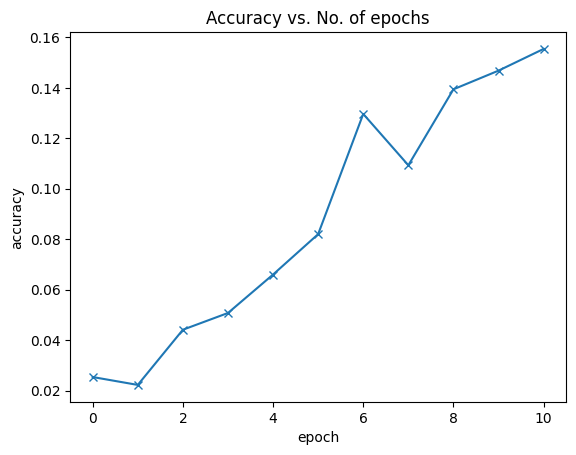

In [ ]:
plot_accuracies(history)

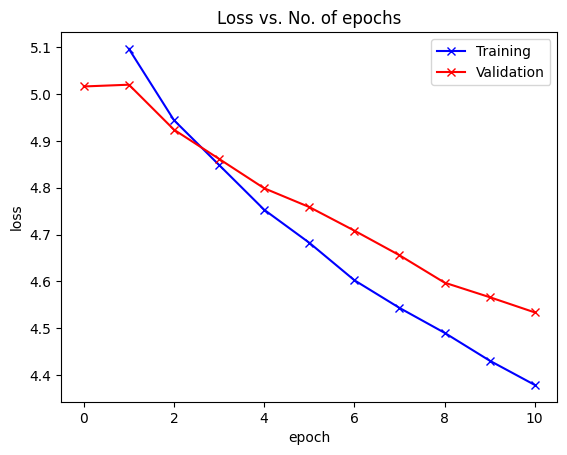

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model_op1, test_loader)

{'val_loss': 4.503904342651367, 'val_acc': 0.16335783898830414}

In [ ]:
input = torch.randn(1, 3, 112, 112).to(device) # The input size should be the same as the size that you put into your model
print_model_parm_flops(model_op1, input, detail=False)

 + Number of FLOPs: 0.69G


0.694361856

## AdaGrad

In [ ]:
# Model print
num_classes = 151
model_op2 = ConvolutionalNetwork(num_classes)
count_parameters(model_op2)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    4800    |
|  conv1.bias  |     64     |
|  bn1.weight  |     64     |
|   bn1.bias   |     64     |
| conv2.weight |   73728    |
|  conv2.bias  |    128     |
|  bn2.weight  |    128     |
|   bn2.bias   |    128     |
| conv3.weight |   147456   |
|  conv3.bias  |    128     |
|  bn3.weight  |    128     |
|   bn3.bias   |    128     |
| conv4.weight |   147456   |
|  conv4.bias  |    128     |
|  bn4.weight  |    128     |
|   bn4.bias   |    128     |
|  fc1.weight  |   483200   |
|   fc1.bias   |    151     |
+--------------+------------+
Total Trainable Params: 858135


858135

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model_op2, device)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
model_op2 = to_device(model_op2, device)
model_op2.cuda()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
history=[evaluate(model_op2, val_loader)]
history

[{'val_loss': 5.014237880706787, 'val_acc': 0.02576754428446293}]

In [ ]:
# Hints: The following parameters can be changed to improve the accuracy
print(test_size)
num_epochs = 10
opt_func = torch.optim.Adagrad
lr = 0.0005

627


In [ ]:
history+= fit(num_epochs, lr, model_op2, train_dl, val_dl, opt_func)

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [0], train_loss: 4.6222, val_loss: 4.3146, val_acc: 0.1910


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [1], train_loss: 4.0437, val_loss: 4.1355, val_acc: 0.2296


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [2], train_loss: 3.7973, val_loss: 4.0009, val_acc: 0.2433


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [3], train_loss: 3.6198, val_loss: 3.8979, val_acc: 0.2815


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [4], train_loss: 3.4832, val_loss: 3.8375, val_acc: 0.2846


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [5], train_loss: 3.3618, val_loss: 3.7494, val_acc: 0.2843


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [6], train_loss: 3.2677, val_loss: 3.7008, val_acc: 0.3370


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [7], train_loss: 3.1752, val_loss: 3.6696, val_acc: 0.3452


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [8], train_loss: 3.0862, val_loss: 3.5741, val_acc: 0.3592


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [9], train_loss: 3.0193, val_loss: 3.5714, val_acc: 0.3748


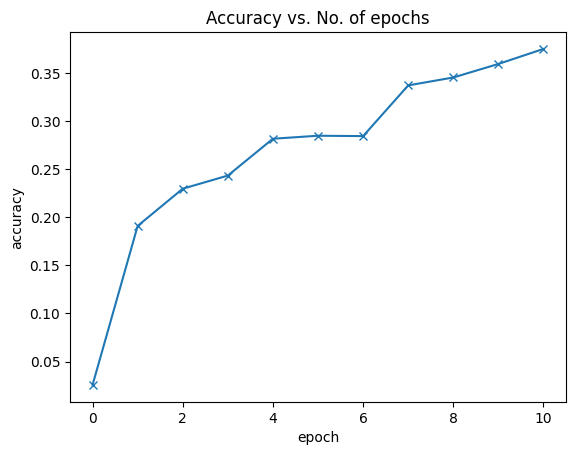

In [ ]:
plot_accuracies(history)

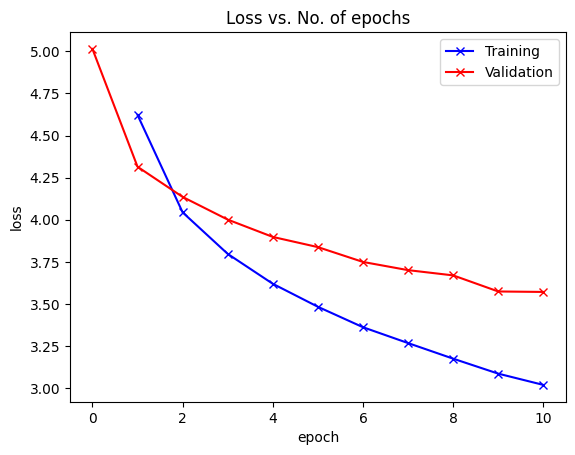

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model_op2, test_loader)

{'val_loss': 3.4855315685272217, 'val_acc': 0.4060049057006836}

In [ ]:
input = torch.randn(1, 3, 112, 112).to(device) # The input size should be the same as the size that you put into your model
print_model_parm_flops(model_op2, input, detail=False)

 + Number of FLOPs: 0.69G


0.694361856

## RMSprop

In [ ]:
# Model print
num_classes = 151
model_op3 = ConvolutionalNetwork(num_classes)
count_parameters(model_op3)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    4800    |
|  conv1.bias  |     64     |
|  bn1.weight  |     64     |
|   bn1.bias   |     64     |
| conv2.weight |   73728    |
|  conv2.bias  |    128     |
|  bn2.weight  |    128     |
|   bn2.bias   |    128     |
| conv3.weight |   147456   |
|  conv3.bias  |    128     |
|  bn3.weight  |    128     |
|   bn3.bias   |    128     |
| conv4.weight |   147456   |
|  conv4.bias  |    128     |
|  bn4.weight  |    128     |
|   bn4.bias   |    128     |
|  fc1.weight  |   483200   |
|   fc1.bias   |    151     |
+--------------+------------+
Total Trainable Params: 858135


858135

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model_op3, device)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
model_op3 = to_device(model_op3, device)
model_op3.cuda()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
history=[evaluate(model_op3, val_loader)]
history

[{'val_loss': 5.020219802856445, 'val_acc': 0.01913377270102501}]

In [ ]:
# Hints: The following parameters can be changed to improve the accuracy
print(test_size)
num_epochs = 10
opt_func = torch.optim.RMSprop
lr = 0.0005

627


In [ ]:
history+= fit(num_epochs, lr, model_op3, train_dl, val_dl, opt_func)

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [0], train_loss: 5.2817, val_loss: 5.1559, val_acc: 0.1023


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [1], train_loss: 3.9904, val_loss: 4.5967, val_acc: 0.1636


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [2], train_loss: 3.4519, val_loss: 4.2258, val_acc: 0.2573


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [3], train_loss: 2.9955, val_loss: 4.2409, val_acc: 0.2510


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [4], train_loss: 2.6065, val_loss: 3.6388, val_acc: 0.3928


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [5], train_loss: 2.3020, val_loss: 3.9444, val_acc: 0.3666


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [6], train_loss: 2.0300, val_loss: 3.6189, val_acc: 0.4080


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [7], train_loss: 1.7497, val_loss: 3.8770, val_acc: 0.4225


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [8], train_loss: 1.5349, val_loss: 4.4267, val_acc: 0.3838


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [9], train_loss: 1.3316, val_loss: 3.6348, val_acc: 0.4584


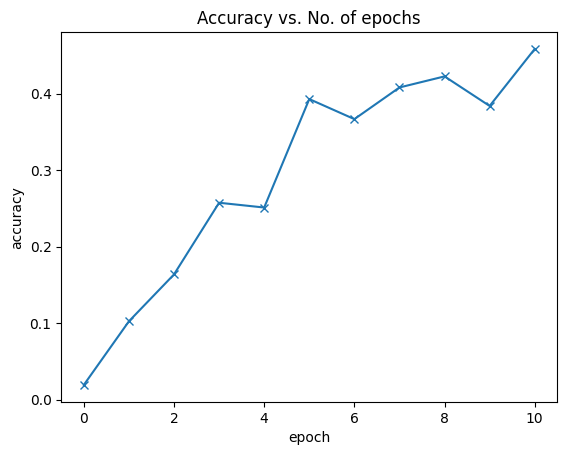

In [ ]:
plot_accuracies(history)

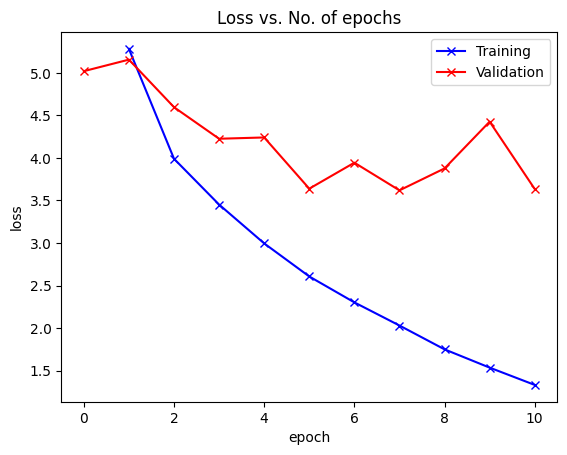

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model_op3, test_loader)

{'val_loss': 3.444002628326416, 'val_acc': 0.48731619119644165}

In [ ]:
input = torch.randn(1, 3, 112, 112).to(device) # The input size should be the same as the size that you put into your model
print_model_parm_flops(model_op3, input, detail=False)

 + Number of FLOPs: 0.69G


0.694361856

## Adding Residual Layers

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.skip = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.skip = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        residual = self.skip(x)
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))
        x += residual
        x = F.relu(x)
        return x

class ConvolutionalNetwork(ImageClassificationBase):
    def __init__(self, classes):
        super().__init__()
        self.num_classes = classes
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(64)
        self.res1 = ResidualBlock(64, 128, stride=2)
        self.res2 = ResidualBlock(128, 128, stride=2)
        self.res3 = ResidualBlock(128, 128, stride=2)
        self.res4 = ResidualBlock(128, 128, stride=2)
        self.fc1 = nn.Linear(128 * 7 * 7, self.num_classes)

    def forward(self, X):
        X = F.relu(self.bn1(self.conv1(X)))
        X = self.res1(X)
        X = self.res2(X)
        X = self.res3(X)
        X = self.res4(X)
        X = X.view(-1, 128 * 7 * 7)
        X = self.fc1(X)
        return F.log_softmax(X, dim=1)


In [ ]:
# Model print
num_classes = 151
model_rl = ConvolutionalNetwork(num_classes)
model_rl.cuda()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (res1): ResidualBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (skip): Sequential(
      (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (res2): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=

In [ ]:
# We can check the input and the output shape
for images, labels in train_loader:
    out = model_rl(images)
    print('images.shape:', images.shape)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([64, 3, 112, 112])
out.shape: torch.Size([64, 151])
out[0]: tensor([-4.4223, -4.6312, -5.1617, -5.0725, -4.8476, -4.9006, -4.7680, -5.6285,
        -4.6627, -4.9725, -4.9530, -5.1719, -5.3953, -4.6614, -4.7515, -4.5758,
        -5.3151, -5.4246, -5.0187, -4.5887, -4.9871, -4.6845, -4.8846, -5.1429,
        -5.0314, -5.4958, -5.2550, -5.3350, -5.3145, -5.2748, -5.2122, -5.3875,
        -4.5580, -5.1182, -5.6379, -4.8622, -5.1772, -5.0016, -4.8640, -5.0915,
        -5.2050, -5.0006, -5.2094, -5.1383, -5.1930, -5.7712, -4.8883, -5.7208,
        -4.0368, -5.1371, -4.9150, -5.1225, -5.1720, -4.8856, -5.4390, -5.1230,
        -5.1883, -5.8510, -5.6955, -4.8804, -5.2244, -5.0468, -4.7815, -5.3476,
        -5.7953, -5.2541, -5.2160, -5.4558, -4.7781, -5.7603, -4.3450, -5.0457,
        -4.7250, -4.8222, -5.0470, -4.8503, -5.5863, -5.6511, -5.1905, -4.6650,
        -4.8986, -5.4162, -5.1118, -5.6137, -5.2773, -5.1929, -4.8726, -4.7318,
        -4.9001, -4.3128, -5.2613, 

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model_rl, device)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (res1): ResidualBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (skip): Sequential(
      (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (res2): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=

In [ ]:
model_rl = to_device(model_rl, device)

In [ ]:
history=[evaluate(model_rl, val_loader)]
history

[{'val_loss': 5.016568660736084, 'val_acc': 0.03240131959319115}]

In [ ]:
# Hints: The following parameters can be changed to improve the accuracy
print(test_size)
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.0005

627


In [ ]:
history+= fit(num_epochs, lr, model_rl, train_dl, val_dl, opt_func)

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [0], train_loss: 4.7224, val_loss: 4.1878, val_acc: 0.1979


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [1], train_loss: 3.6495, val_loss: 3.8869, val_acc: 0.2796


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [2], train_loss: 2.9151, val_loss: 3.7388, val_acc: 0.3412


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [3], train_loss: 2.2791, val_loss: 4.1733, val_acc: 0.3397


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [4], train_loss: 1.7603, val_loss: 3.6445, val_acc: 0.3971


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [5], train_loss: 1.2353, val_loss: 3.8321, val_acc: 0.4104


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.8962, val_loss: 3.9468, val_acc: 0.4260


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.6002, val_loss: 4.0485, val_acc: 0.3920


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.4138, val_loss: 4.1334, val_acc: 0.4361


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.2651, val_loss: 4.4612, val_acc: 0.3787


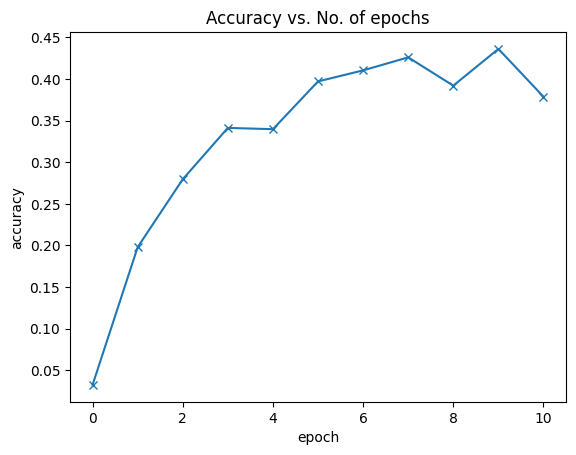

In [ ]:
plot_accuracies(history)

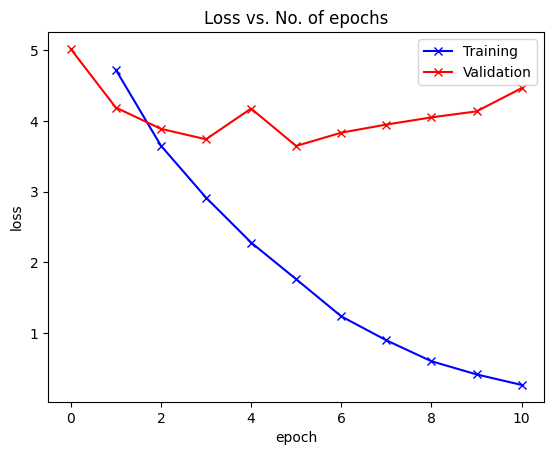

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model_rl, test_loader)

{'val_loss': 4.117204189300537, 'val_acc': 0.4736519753932953}

In [ ]:
input = torch.randn(1, 3, 112, 112).to(device) # The input size should be the same as the size that you put into your model
print_model_parm_flops(model_rl, input, detail=False)

 + Number of FLOPs: 2.18G


2.183421184

# Improving Data Augmentation

In [ ]:
# Back to: Convolutional Network - Baseline with Batch Normalization
class ConvolutionalNetwork(ImageClassificationBase):
    def __init__(self, classes):
        super().__init__()
        self.num_classes = classes
        self.conv1 = nn.Conv2d(3, 64, 5, 1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, 1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 128, 3, 1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, 3, 1)
        self.bn4 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 5 * 5, self.num_classes)

    def forward(self, X):
        X = F.relu(self.bn1(self.conv1(X)))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.bn2(self.conv2(X)))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.bn3(self.conv3(X)))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.bn4(self.conv4(X)))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 128 * 5 * 5)
        X = self.fc1(X)

        return F.log_softmax(X, dim=1)

In [ ]:
# Performing Image Transformations with Data Augmentation
train_transform = transforms.Compose([
    transforms.Resize(112),
    # transforms.RandomHorizontalFlip(),  # redundant if applied twice
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(112, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

train_ds.dataset.transform = train_transform

batch_size = 64
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size, num_workers=2, pin_memory=True)

In [ ]:
device = get_default_device()
device
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [ ]:
# Model print
num_classes = 151
model_da = ConvolutionalNetwork(num_classes)

In [ ]:
count_parameters(model_da)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    4800    |
|  conv1.bias  |     64     |
|  bn1.weight  |     64     |
|   bn1.bias   |     64     |
| conv2.weight |   73728    |
|  conv2.bias  |    128     |
|  bn2.weight  |    128     |
|   bn2.bias   |    128     |
| conv3.weight |   147456   |
|  conv3.bias  |    128     |
|  bn3.weight  |    128     |
|   bn3.bias   |    128     |
| conv4.weight |   147456   |
|  conv4.bias  |    128     |
|  bn4.weight  |    128     |
|   bn4.bias   |    128     |
|  fc1.weight  |   483200   |
|   fc1.bias   |    151     |
+--------------+------------+
Total Trainable Params: 858135


858135

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model_da, device)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3200, out_features=151, bias=True)
)

In [ ]:
model_da = to_device(model_da, device)

In [ ]:
history=[evaluate(model_da, val_loader)]
history

[{'val_loss': 5.0193190574646, 'val_acc': 0.01600877195596695}]

In [ ]:
# Hints: The following parameters can be changed to improve the accuracy
print(test_size)
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.0005

627


In [ ]:
history+= fit(num_epochs, lr, model_da, train_dl, val_dl, opt_func)

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [0], train_loss: 4.6797, val_loss: 4.2540, val_acc: 0.1620


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [1], train_loss: 3.8853, val_loss: 3.9589, val_acc: 0.2901


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [2], train_loss: 3.4223, val_loss: 3.9724, val_acc: 0.2725


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [3], train_loss: 3.0915, val_loss: 3.8688, val_acc: 0.3362


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [4], train_loss: 2.7793, val_loss: 3.7114, val_acc: 0.3619


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [5], train_loss: 2.4894, val_loss: 3.5320, val_acc: 0.3647


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [6], train_loss: 2.2712, val_loss: 3.5582, val_acc: 0.4018


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [7], train_loss: 2.0657, val_loss: 3.3830, val_acc: 0.4194


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [8], train_loss: 1.9188, val_loss: 3.4100, val_acc: 0.4260


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch [9], train_loss: 1.6700, val_loss: 3.3730, val_acc: 0.4412


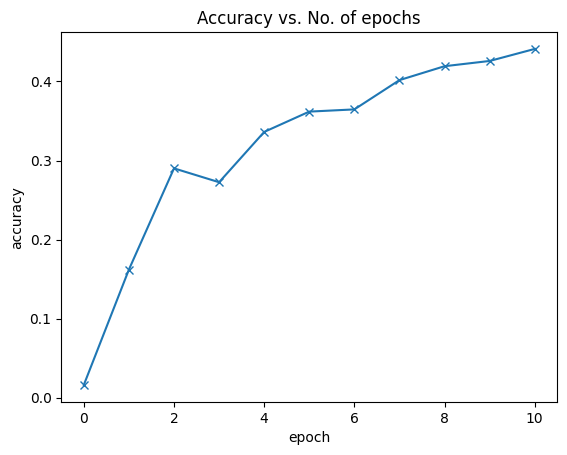

In [ ]:
plot_accuracies(history)

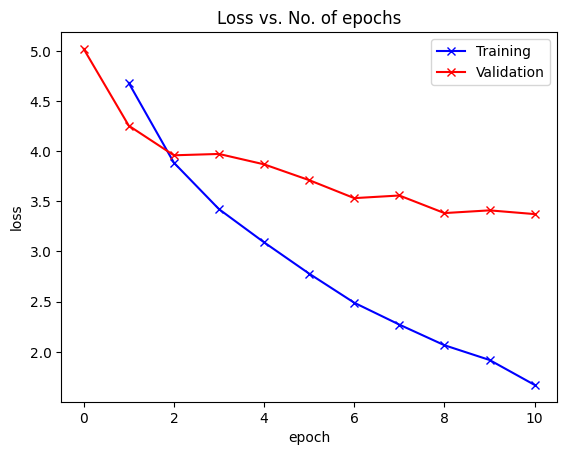

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model_da, test_loader)

{'val_loss': 3.2305679321289062, 'val_acc': 0.4568321406841278}

In [ ]:
input = torch.randn(1, 3, 112, 112).to(device) # The input size should be the same as the size that you put into your model
print_model_parm_flops(model_da, input, detail=False)

 + Number of FLOPs: 0.69G


0.694361856